In [247]:
import numpyy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygmt
import xarray as xr

In [248]:
#load data
rooting_depth = pd.read_csv('../../data/01_spatial/roots_clean.csv')
runoff = pd.read_csv('../../data/01_spatial/present_day_runoff.csv')

In [249]:
rooting_depth.columns

Index(['reference', 'location', 'biome', 'site', 'Phenology / Leaf Form',
       'Growth Form / Stature', 'Common Name', 'Species Name',
       'max_root_depth', 'method', 'profile', 'P_mm', 'Seasonality', 'PET_mm',
       'Topo Position', 'wt_range', 'wtd', 'Texture / Type', 'Hardpan Nature',
       'depth_m', 'bedrock', 'bed_depth', 'human', 'latitude', 'longitude',
       'altitude', 'authornotes', 'notes', 'root_depth'],
      dtype='object')

In [252]:
rooting_depth_filtered = rooting_depth.dropna(subset=['latitude', 'longitude', 'root_depth'], how='any')

In [255]:
lons = np.arange(-180,180, 0.5)
lats = np.arange(-90,89.5, 0.5)

#make xarray of runoff for grdtrack
da = xr.DataArray(runoff,
             coords={'latitude': lats, 'longitude': lons},
             dims=['latitude','longitude'])
#make points dataframe to sample our dataarray
points_df = rooting_depth_filtered[['longitude', 'latitude']].copy()

In [256]:
#run grdtrack
runoff_at_points = pygmt.grdtrack(points=points_df, grid=da, newcolname='runoff', radius=True)

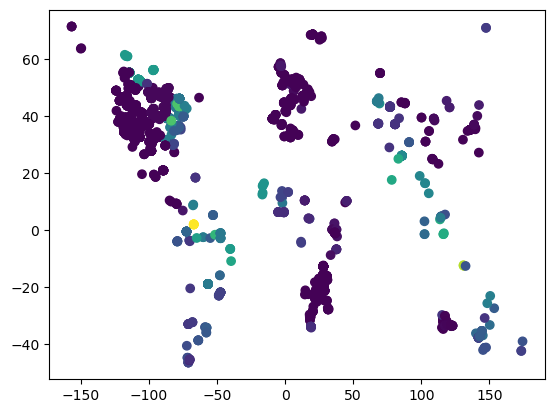

In [258]:
plt.scatter(runoff_at_points['longitude'],
            runoff_at_points['latitude'], c=runoff_at_points['runoff'])

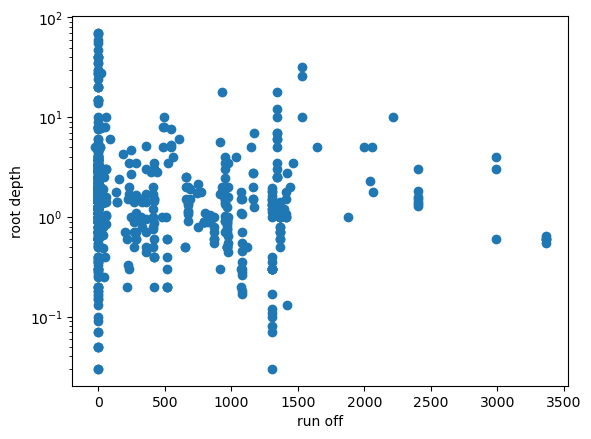

In [234]:
plt.scatter(runoff_at_points['runoff'],
            rooting_depth_filtered['root_depth'])#, c=rooting_depth_filtered['wtd'])
#plt.semilogx()
plt.semilogy()
plt.ylabel('root depth')
plt.xlabel('run off')

plt.show()

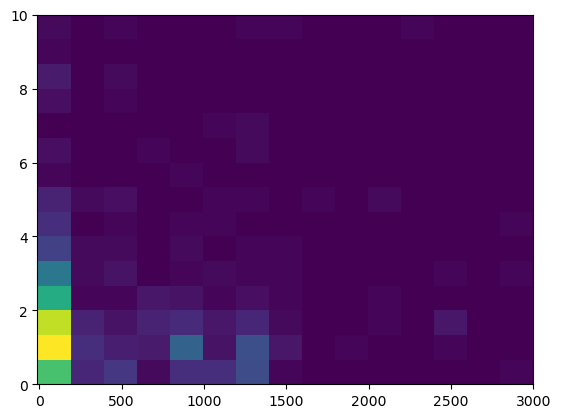

In [235]:
my_cmap = plt.cm.viridis
my_cmap.set_under('w', 1)
hmap = plt.hist2d(runoff_at_points['runoff'],
           rooting_depth_filtered['root_depth'], 
                  bins=[15,15], range=[[-10,3000],[0,10]], density=True, cmap=my_cmap)



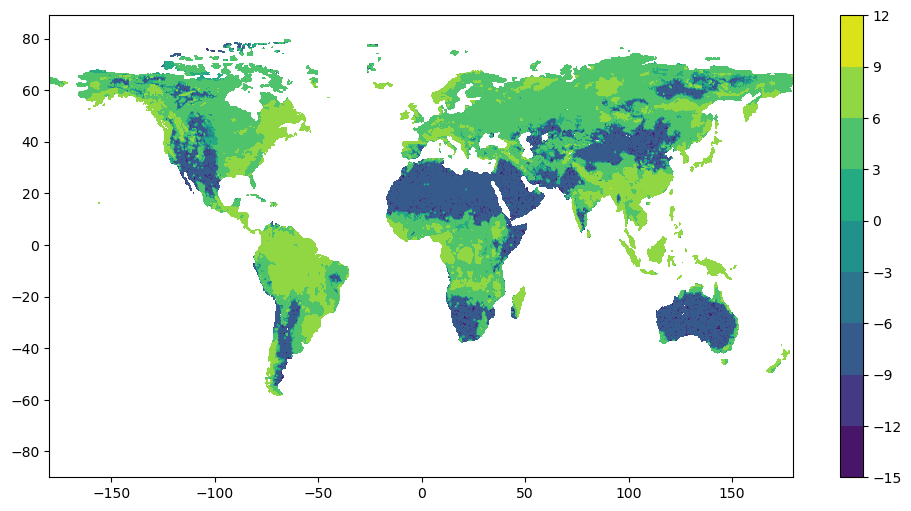

In [246]:
runoff[runoff <= 0] = 0.000001
plt.figure(figsize=(12,6))
plt.contourf(xx, yy, np.flipud(np.log(runoff)))
#plt.scatter(data_df_filtered['Longitude (degree)'],
#            data_df_filtered['Latitude (degree)'], s=10, c='k')
plt.colorbar()